In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
import time

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

import numpy as np
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=4)

import pandas as pd
from pandas import ExcelFile

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 300)

#pd.set_option('precision', 5)

import pprint

In [3]:
import nltk
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords
import string
stopWords = stopwords.words('english') + list(string.punctuation)

from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [10]:
from sklearn.model_selection import KFold,train_test_split,StratifiedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor,RandomizedLasso
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.feature_selection import RFE, RFECV

In [4]:
#os.getcwd()
#!ls
os.chdir('/Users/zacklarsen/Dropbox/Datasets/')
!ls

Adeel Qureshi - Assessor.csv
Adeel Qureshi - Assessor.xlsx
AssessorCSV.csv
Axiometrics Trends.xlsx
CA 2.txt
CA.txt
CA.xls
CA_3M.txt
Chuckor_Assessor_Layout_20161103.xlsx
Deed_CA.txt.zip
Exploratory-Rental Crawl Sample_for_Austin.ipynb
Exploratory-Rental+Crawl+Sample.xlsx.py
FirstAmListing.txt
Icon?
Int%2FExt Attribute Example (1).xlsx
RCA Data Sample.xls
Real Capital Analytics Sample.xls
Rent Zip Map.xlsx
Rental Crawl Sample.csv
Rental Crawl Sample.xlsx
Tuesday.csv
Tuesday_new.csv
rentcrawl_addresses.csv


In [5]:
FAL = pd.read_table('FirstAmListing.txt',sep='|',error_bad_lines=False,nrows=1000)

In [6]:
FAL.head(5)

,Property Address,Property City,Property State,Property Zip,Property Zip + 4,Assessor's Parcel Identification Number,County FIPS,Internal FA Property Ref ID,Property Type,Property Sub-Type,Lot Size (Sq Ft),Home Size (Sq Ft),Home or Building Style,Heating Type,Heating Fuel Type,Cooling Type,Cooling Fuel Type,Number of Stories,Year Built,Roof Type,Exterior Construction,Number of Bedrooms,Number of Bathrooms,Number of Garages,Garage Type,Pool Features,View Features,Price per Square Feet,Porch,Patio,Deck,Basement,Air Conditioner,Number of Fireplaces,Presence of Fireplace,Fireplace Description,Interior Features,Exterior Features,Existing Structures,Property Details,Lot Features,Zoning,Neighborhood,School District,Elementary School,Middle School,High School,Appliances,Approximate Lot Dimensions,Topogrophy,Waterfront Features,Water,Water Source,Water Amenities,Water Access,Water Heater,FA Calculated Days on Market,Current Original Listing Date,Listing Number,Status,Status Sub Type,Rental Ind,Current Listing Price,Sold Price,Sold Date,FA Adjusted Sold Price,FA Sold Price Range,Listing Tracking ID,FA Unique Listing Identifier - Ref ID,Update Timestamp,"Add, Change, Delete Indicator"
0,18775 Hombre Ln,Murrieta,CA,92562,8545.0,931-020-005,6065,16083141,SFR,NaN,226512.0,5200.0,SEE REMARKS,NaN,NaN,CENTRAL,NaN,NaN,2003.0,SPANISH TILE,NaN,4.0,4.5,8.0,NaN,NONE,"HILLS VIEW, POND VIEW, SEE REMARKS",361.0,,,,,NaN,NaN,NaN,"FIREPLACE IN FAMILY ROOM, FIREPLACE IN MASTER ...","BALCONY, BAR, BATHTUB, BEAMED CEILINGS, BUILT-...",CORRAL,NaN,CLASSIC EARLY CALIFORNIA RANCHO...Situated on ...,"BACK YARD, HORSE PROPERTY, HORSE PROPERTY IMPR...",NaN,NaN,NaN,NaN,NaN,NaN,"6 BURNER STOVE, DISHWASHER, MICROWAVE, OVEN - ...",NaN,NaN,NaN,NaN,WELL,NaN,NaN,NaN,830.0,2014-06-09,SW14120259,Active,NaN,NaN,1875000.0,NaN,NaN,NaN,NaN,12682556,201406092016091500126825560000000013,2016-09-15,C
1,621 Benson Ave,Modesto,CA,95354,3873.0,035-041-025,6099,21517390,"MULTI FAMILY DWELLING, RESIDENTIAL (NEC)","MULTI FAMILY DWELLING, SFR",9828.0,1056.0,NaN,CENTRAL FURNACE,NaN,CENTRAL,NaN,1,1949.0,NaN,NaN,3.0,2.0,NaN,"DRIVEWAY, PAVED",NaN,NaN,156.0,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very nice duplex in very good condition. Centr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.0,2015-12-23,MC15266018,Active,NaN,NaN,164900.0,NaN,NaN,NaN,NaN,23292229,201601022016091500232922290000000013,2016-09-15,C
2,621 S Santa Fe St,Visalia,CA,93292,2902.0,097-064-028,6107,21770508,MULTI FAMILY DWELLING,SFR,6534.0,1157.0,NaN,NaN,NaN,NaN,NaN,NaN,1980.0,NaN,NaN,8.0,4.0,NaN,NaN,NaN,NaN,242.0,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hard to find 4Plex ! Fully Occupied ! Turnkey ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OWER,NaN,NaN,NaN,NaN,422.0,2015-07-20,117217,Pending,NaN,NaN,279900.0,NaN,NaN,NaN,NaN,19415909,201507222016091500194159090000000009,2016-09-15,C
3,1658 Crespi Ln,Pebble Beach,CA,93953,3305.0,008-392-007,6053,14700592,SFR,"DETACHED, SFR",148540.0,10136.0,"DETACHED, MED, MEDITERRANEAN","FA, FORCED AIR, GAS, NATURAL GAS, RA, RADIANT",NaN,"CENTRAL, CENTRAL FORCED AIR",NaN,2,1961.0,"FLT, SPT, TILE, TLE","CO, STUCCO, TS",5.0,7.0,NaN,"CARPORT DETACHED, CPD",POOL - NO,"BACK BAY, BAY VIEW, COASTLINE, MOUNTAIN VIEW, ...",1332.0,,,,,NaN,NaN,Y,"BATH, BNS, BONUS ROOM, BTH, CPD, FIREPLACE IN ...","CATHEDRAL-VAULTED CEILINGS, CERAMIC COUNTERS, ...","CO, CORRAL, SATELLITE DISH, TS",NaN,Originally designed by Robert Farquhar & broug...,NaN,R-1,NaN,"CARMEL UNIFIED, OTHER",NaN,NaN,NaN,"BBQ, BIR, BUILT IN RANGE, CCO, CONTINUOUS CLEA...",NaN,NaN,NaN,"HEATER - GAS, PUBLIC",NaN,NaN,PHA,NaN,728.0,2014-09-15,ML81433223,Sold,NaN,NaN,18000000.0,13500000.0,2016-09-12,13501000.0,13499800-13500200,15472806,201609122016091500154728060000000081,2016-09-15,C
4,125 Madden Ln,Willits,CA,95490,3552.0,005-215-24,6045,14483320,RESIDENTIAL (NEC),MULTI FAMILY DWELLING,10019.0,2150.0,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,180.0,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Terrific investment! Nice, s

In [7]:
# Group and aggregate by

example = pd.DataFrame(FAL.groupby(['County FIPS'])['Home Size (Sq Ft)'].mean())

example = example.sort_values(['Home Size (Sq Ft)'],ascending=[1])

example

,Home Size (Sq Ft)
County FIPS,
6055,962.000000
6033,1080.000000
6047,1291.000000
6067,1304.750000
6087,1488.000000
6045,1556.666667
6111,1600.666667
6107,1627.454545
6041,1705.000000


ValueError: max must be larger than min in range parameter.

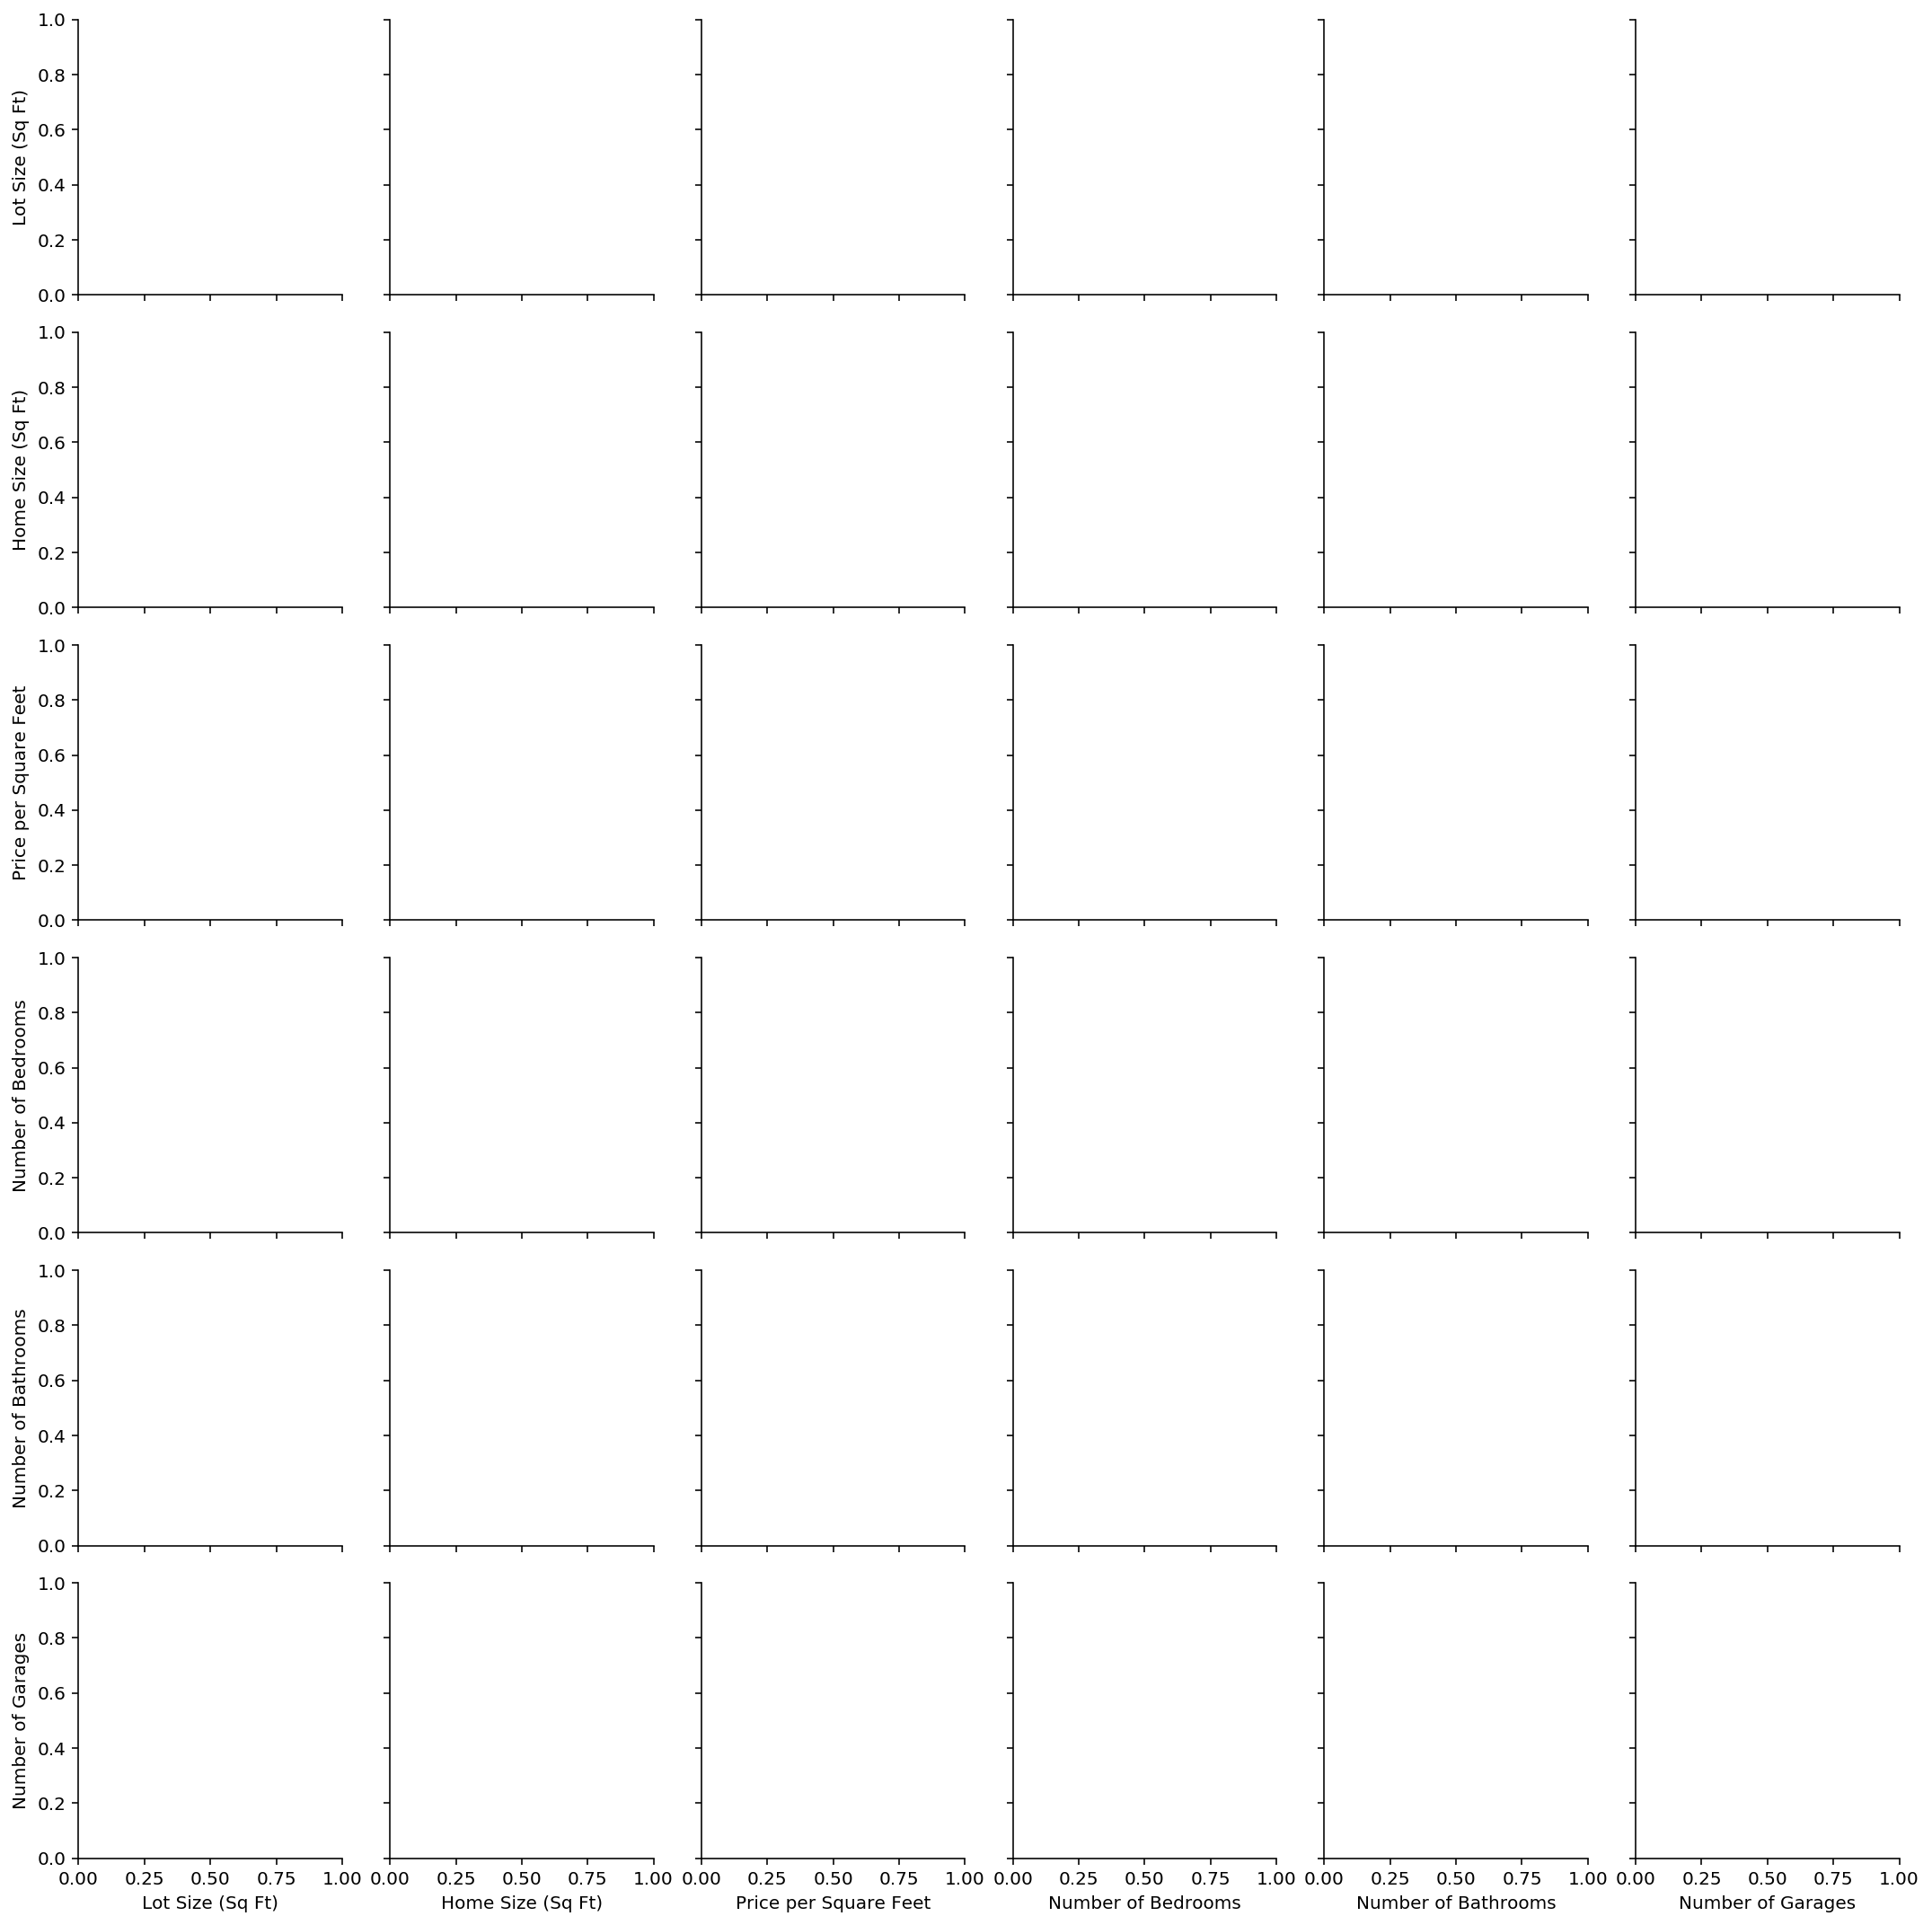

In [12]:
# Before running this, make sure to remove NaN values

g = sns.pairplot(FAL[['Lot Size (Sq Ft)','Home Size (Sq Ft)','Price per Square Feet',
                      'Number of Bedrooms','Number of Bathrooms','Number of Garages']])
                 hue='Number of Bedrooms',
                 palette='afmhot',size=1)

g.set(xticklabels=[])

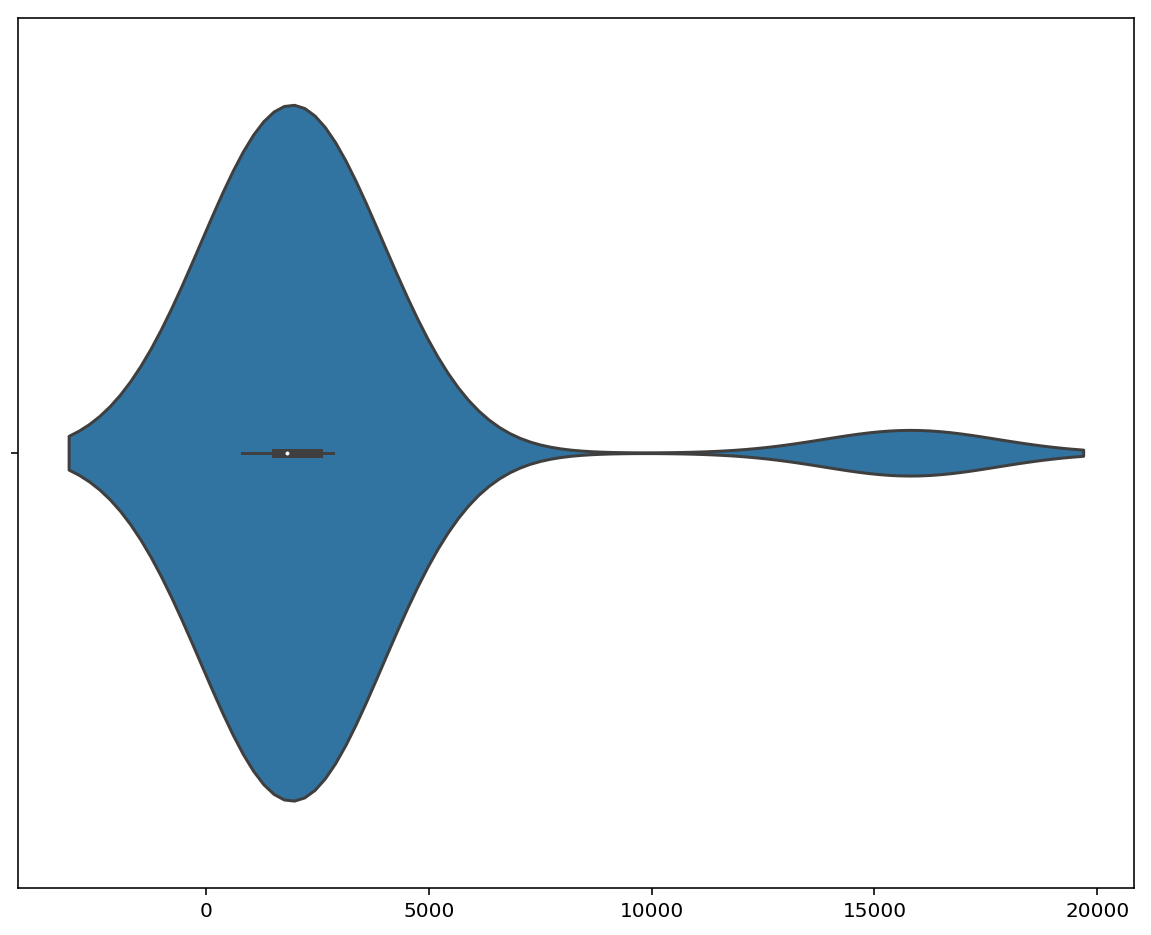

In [54]:
fig, ax = plt.subplots(figsize=(10,8))

grid = sns.violinplot(example)

#grid.set_xticklabels(labels = example['County FIPS'],rotation=90)

In [52]:
example = pd.DataFrame(FAL.groupby(['Property Type'])['Home Size (Sq Ft)'].mean())

example = example.sort_values(['Home Size (Sq Ft)'],ascending=[1])

example

,Home Size (Sq Ft)
Property Type,
TOWNHOUSE/ROWHOUSE,800.000000
MOBILE HOME,1200.000000
CABIN,1260.000000
MANL,1307.500000
DPLX,1564.500000
CONDOMINIUM,1613.272727
"MULTI FAMILY DWELLING, QUADRUPLEX",1764.000000
"DUPLEX, MULTI FAMILY DWELLING, RESIDENTIAL (NEC)",1800.000000
VACANT LAND (NEC),1828.750000


KeyError: 'Property Type'

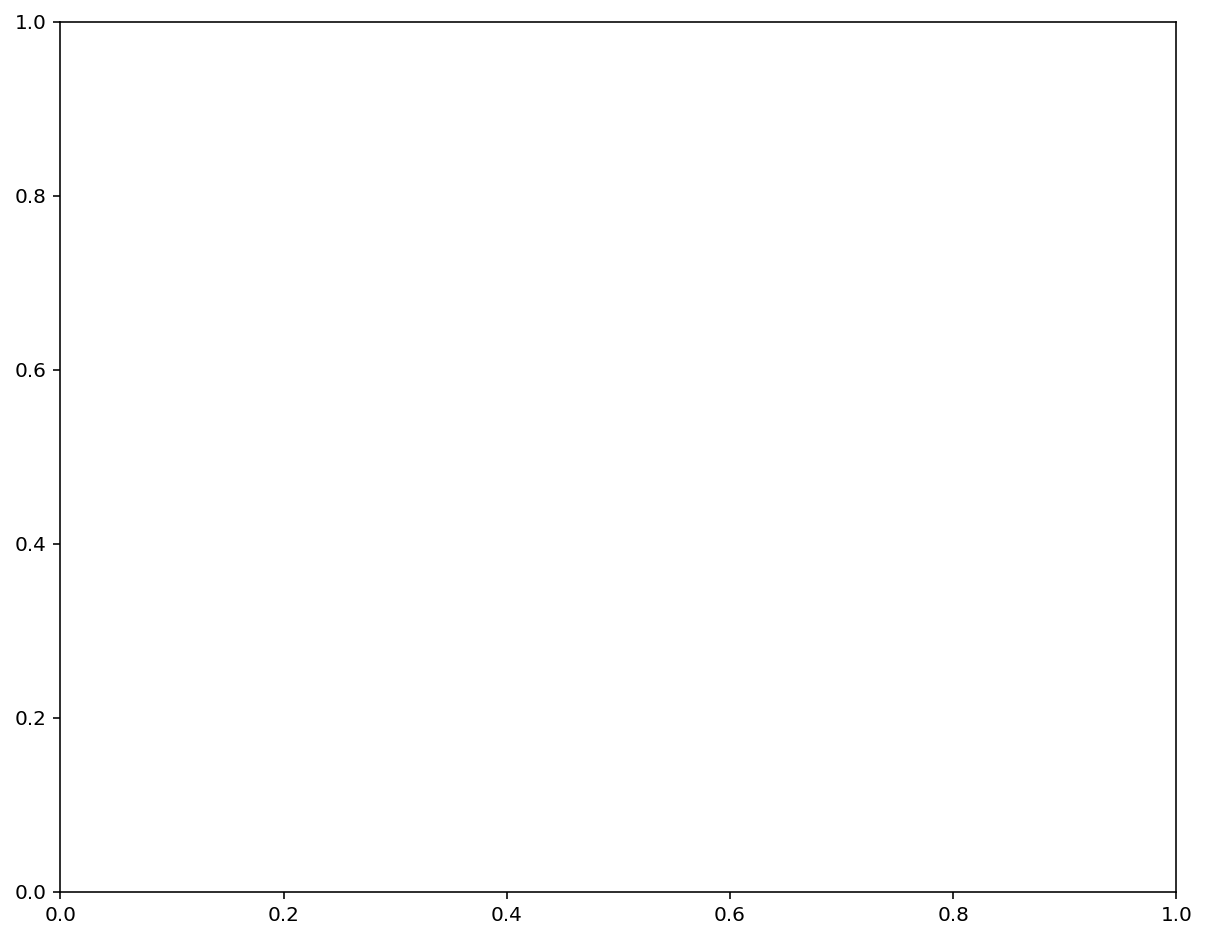

In [53]:
fig, ax = plt.subplots(figsize=(10,8))

grid = sns.boxplot(example['Property Type'],example['Home Size (Sq Ft)'])

grid.set_xticklabels(labels = example['Property Type'],rotation=90)

In [6]:
# Sort columns by number of missing values
count_nan = len(FAL) - FAL.count()
count_nan.sort_values(inplace=True,ascending=False)
count_nan
countDF = pd.DataFrame(count_nan)

Cooling Fuel Type                          281
Topogrophy                                 281
Waterfront Features                        281
Water Amenities                            281
Water Heater                               281
Number of Fireplaces                       279
Rental Ind                                 278
Approximate Lot Dimensions                 277
Existing Structures                        277
Heating Fuel Type                          276
Water Source                               275
Status Sub Type                            271
Exterior Features                          267
Neighborhood                               258
Interior Features                          257
Air Conditioner                            255
Presence of Fireplace                      250
Fireplace Description                      248
Home or Building Style                     247
Water Access                               246
Sold Price                                 245
FA Adjusted S

In [7]:
TextualFeatures = FAL.loc[:,['Fireplace Description','Interior Features','Exterior Features',
                             'Property Details','Lot Features','Appliances','View Features']]
TextualFeatures

,Fireplace Description,Interior Features,Exterior Features,Property Details,Lot Features,Appliances,View Features
0,"FIREPLACE IN FAMILY ROOM, FIREPLACE IN MASTER ...","BALCONY, BAR, BATHTUB, BEAMED CEILINGS, BUILT-...",CORRAL,CLASSIC EARLY CALIFORNIA RANCHO...Situated on ...,"BACK YARD, HORSE PROPERTY, HORSE PROPERTY IMPR...","6 BURNER STOVE, DISHWASHER, MICROWAVE, OVEN - ...","HILLS VIEW, POND VIEW, SEE REMARKS"
1,NaN,NaN,NaN,Very nice duplex in very good condition. Centr...,NaN,NaN,NaN
2,NaN,NaN,NaN,Hard to find 4Plex ! Fully Occupied ! Turnkey ...,NaN,NaN,NaN
3,"BATH, BNS, BONUS ROOM, BTH, CPD, FIREPLACE IN ...","CATHEDRAL-VAULTED CEILINGS, CERAMIC COUNTERS, ...","CO, CORRAL, SATELLITE DISH, TS",Originally designed by Robert Farquhar & broug...,NaN,"BBQ, BIR, BUILT IN RANGE, CCO, CONTINUOUS CLEA...","BACK BAY, BAY VIEW, COASTLINE, MOUNTAIN VIEW, ..."
4,NaN,NaN,NaN,"Terrific investment! Nice, single story duplex...",NaN,NaN,NaN
5,NaN,NaN,NaN,Must see to believe! A beautiful custom home f...,NaN,"DISHWASHER, GARBAGE DISPOSER, MICROWAVE, OVEN,...","CITY VIEW, MOUNTAIN VIEW"
6,NaN,NaN,NaN,"Rents have been increased,property is fully oc...",NaN,NaN,NaN
7,NaN,NaN,NaN,Two houses on a lot. Can be used for multiple...,FRONT YARD,NaN,NONE
8,NaN,NaN,NaN,"This unique property has three homes, excellen...",NaN,"OVEN, RANGE",NaN
9,NaN,NaN,NaN,16 units all rented bringing in good rent. the...,NaN,NaN,NaN


In [20]:
TextualFeatures.iloc[0].values

array(['FIREPLACE IN FAMILY ROOM, FIREPLACE IN MASTER BEDROOM, OUTDOORS, SEE REMARKS',
       'BALCONY, BAR, BATHTUB, BEAMED CEILINGS, BUILT-INS, CATHEDRAL-VAULTED CEILINGS, CEILING FAN, COFFERED CEILING(S), GRANITE COUNTERS, KITCHEN ISLAND, PANTRY, RECESSED LIGHTING, SHOWER, WET BAR',
       'CORRAL',
       'CLASSIC EARLY CALIFORNIA RANCHO...Situated on one of the loveliest oak studded four plus acre parcels on the Santa Rosa Plateau, this carefully crafted rustic retreat exudes old world charm and warmth. Encompassing approximately 5200 square feet, the four bedroom residence features hardwood flooring, tile flooring some with wood inset, stained concrete, granite counters, beamed ceilings with softened edges, faux finished walls, stone fireplace, soaring foyer with fountain and huge game room and bar. The kitchen has distressed white walnut cabinetry, stainless appliances, island, sit up bar and pantry area. The owner was the builder and spared no expenses.  Driving onto the proper

In [8]:
FAL['Interior Features'][0]

'BALCONY, BAR, BATHTUB, BEAMED CEILINGS, BUILT-INS, CATHEDRAL-VAULTED CEILINGS, CEILING FAN, COFFERED CEILING(S), GRANITE COUNTERS, KITCHEN ISLAND, PANTRY, RECESSED LIGHTING, SHOWER, WET BAR'

In [9]:
FAL['Lot Features'][0]

'BACK YARD, HORSE PROPERTY, HORSE PROPERTY IMPROVED, LANDSCAPED, PASTURE, SECLUDED'

In [10]:
FAL['Appliances'][0]

'6 BURNER STOVE, DISHWASHER, MICROWAVE, OVEN - DOUBLE'

In [11]:
FAL['Property Details'][0]

'CLASSIC EARLY CALIFORNIA RANCHO...Situated on one of the loveliest oak studded four plus acre parcels on the Santa Rosa Plateau, this carefully crafted rustic retreat exudes old world charm and warmth. Encompassing approximately 5200 square feet, the four bedroom residence features hardwood flooring, tile flooring some with wood inset, stained concrete, granite counters, beamed ceilings with softened edges, faux finished walls, stone fireplace, soaring foyer with fountain and huge game room and bar. The kitchen has distressed white walnut cabinetry, stainless appliances, island, sit up bar and pantry area. The owner was the builder and spared no expenses.  Driving onto the property takes you under the canopies of centuries old oak trees and past the large well fed pond, hand chiseled stone walls, custom rock water feature, paddocks for horses and bridges that take you to absolute serenity. There are numerous patios, decks, fire pit and spa to mention a few of the special places on can

In [15]:
sentence_list = []

for description in FAL['Property Details']:
    #print(description)
    sentences = nltk.sent_tokenize(str(description))
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    sentence_list.append(sentences)
    #print(sentences)

In [16]:
sentence_list

[[[('CLASSIC', 'NNP'),
   ('EARLY', 'NNP'),
   ('CALIFORNIA', 'NNP'),
   ('RANCHO', 'NNP'),
   ('...', ':'),
   ('Situated', 'VBD'),
   ('on', 'IN'),
   ('one', 'CD'),
   ('of', 'IN'),
   ('the', 'DT'),
   ('loveliest', 'JJS'),
   ('oak', 'NN'),
   ('studded', 'VBD'),
   ('four', 'CD'),
   ('plus', 'CC'),
   ('acre', 'JJ'),
   ('parcels', 'NNS'),
   ('on', 'IN'),
   ('the', 'DT'),
   ('Santa', 'NNP'),
   ('Rosa', 'NNP'),
   ('Plateau', 'NNP'),
   (',', ','),
   ('this', 'DT'),
   ('carefully', 'RB'),
   ('crafted', 'VBN'),
   ('rustic', 'JJ'),
   ('retreat', 'NN'),
   ('exudes', 'NNS'),
   ('old', 'JJ'),
   ('world', 'NN'),
   ('charm', 'NN'),
   ('and', 'CC'),
   ('warmth', 'NN'),
   ('.', '.')],
  [('Encompassing', 'VBG'),
   ('approximately', 'RB'),
   ('5200', 'CD'),
   ('square', 'JJ'),
   ('feet', 'NNS'),
   (',', ','),
   ('the', 'DT'),
   ('four', 'CD'),
   ('bedroom', 'NN'),
   ('residence', 'NN'),
   ('features', 'NNS'),
   ('hardwood', 'VBD'),
   ('flooring', 'NN'),
   (',',

#http://nbviewer.jupyter.org/github/lukewrites/NP_chunking_with_nltk/blob/master/NP_chunking_with_the_NLTK.ipynb

In [23]:
# Chunking

grammar = "NP: {<DT>?<JJ>*<NN>}" 
cp = nltk.RegexpParser(grammar)



for i in sentence_list:
    result = cp.parse(i[0])
    print(result)
    print('-------------------------------------')
    
    

(S
  CLASSIC/NNP
  EARLY/NNP
  CALIFORNIA/NNP
  RANCHO/NNP
  .../:
  Situated/VBD
  on/IN
  one/CD
  of/IN
  the/DT
  loveliest/JJS
  (NP oak/NN)
  studded/VBD
  four/CD
  plus/CC
  acre/JJ
  parcels/NNS
  on/IN
  the/DT
  Santa/NNP
  Rosa/NNP
  Plateau/NNP
  ,/,
  this/DT
  carefully/RB
  crafted/VBN
  (NP rustic/JJ retreat/NN)
  exudes/NNS
  (NP old/JJ world/NN)
  (NP charm/NN)
  and/CC
  (NP warmth/NN)
  ./.)
-------------------------------------
(S
  Very/RB
  (NP nice/JJ duplex/NN)
  in/IN
  very/RB
  (NP good/JJ condition/NN)
  ./.)
-------------------------------------
(S Hard/NNP to/TO find/VB 4Plex/CD !/.)
-------------------------------------
(S
  Originally/RB
  designed/VBN
  by/IN
  Robert/NNP
  Farquhar/NNP
  &/CC
  brought/VBD
  back/RB
  to/TO
  (NP life/NN)
  by/IN
  (NP famed/JJ international/JJ designer/NN)
  Juan/NNP
  Pablo/NNP
  Molyneux/NNP
  ,/,
  Casa/NNP
  Ladera/NNP
  has/VBZ
  undergone/VBN
  (NP an/DT amazing/JJ transformation/NN)
  ./.)
-------------------

In [24]:
sample_text = []
for i in FAL['Property Details']:
    sample_text.append(i)

In [25]:
new_patterns = """
    NP:    {<DT><WP><VBP>*<RB>*<VBN><IN><NN>}
           {<NN|NNS|NNP|NNPS><IN>*<NN|NNS|NNP|NNPS>+}
           {<JJ>*<NN|NNS|NNP|NNPS><CC>*<NN|NNS|NNP|NNPS>+}
           {<JJ>*<NN|NNS|NNP|NNPS>+}
           
    """

new_NPChunker = nltk.RegexpParser(new_patterns)


def prepare_text(input):
    tokenized_sentence = nltk.sent_tokenize(input)  # Tokenize the text into sentences.
    tokenized_words = [nltk.word_tokenize(sentence) for sentence in tokenized_sentence]  # Tokenize words in sentences.
    tagged_words = [nltk.pos_tag(word) for word in tokenized_words]  # Tag words for POS in each sentence.
    word_tree = [new_NPChunker.parse(word) for word in tagged_words]  # Identify NP chunks
    return word_tree  # Return the tagged & chunked sentences.

In [26]:
prepare_text(sample_text[0])

[Tree('S', [Tree('NP', [('CLASSIC', 'NNP'), ('EARLY', 'NNP'), ('CALIFORNIA', 'NNP'), ('RANCHO', 'NNP')]), ('...', ':'), ('Situated', 'VBD'), ('on', 'IN'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('loveliest', 'JJS'), Tree('NP', [('oak', 'NN')]), ('studded', 'VBD'), ('four', 'CD'), ('plus', 'CC'), Tree('NP', [('acre', 'JJ'), ('parcels', 'NNS')]), ('on', 'IN'), ('the', 'DT'), Tree('NP', [('Santa', 'NNP'), ('Rosa', 'NNP'), ('Plateau', 'NNP')]), (',', ','), ('this', 'DT'), ('carefully', 'RB'), ('crafted', 'VBN'), ('rustic', 'JJ'), Tree('NP', [('retreat', 'NN'), ('exudes', 'NNS')]), ('old', 'JJ'), Tree('NP', [('world', 'NN'), ('charm', 'NN')]), ('and', 'CC'), Tree('NP', [('warmth', 'NN')]), ('.', '.')]),
 Tree('S', [('Encompassing', 'VBG'), ('approximately', 'RB'), ('5200', 'CD'), Tree('NP', [('square', 'JJ'), ('feet', 'NNS')]), (',', ','), ('the', 'DT'), ('four', 'CD'), Tree('NP', [('bedroom', 'NN'), ('residence', 'NN'), ('features', 'NNS')]), ('hardwood', 'VBD'), Tree('NP', [('floorin

In [28]:
sentences = prepare_text(sample_text[0])

def return_a_list_of_NPs(sentences):
    nps = []  # an empty list in which to NPs will be stored.
    for sent in sentences:
        tree = new_NPChunker.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'NP':
                t = subtree
                t = ' '.join(word for word, tag in t.leaves())
                nps.append(t)
    return nps


extracted_NPs = return_a_list_of_NPs(sentences)
extracted_NPs

['CLASSIC EARLY CALIFORNIA RANCHO',
 'oak',
 'acre parcels',
 'Santa Rosa Plateau',
 'retreat exudes',
 'world charm',
 'warmth',
 'square feet',
 'bedroom residence features',
 'flooring',
 'tile',
 'wood inset',
 'concrete',
 'granite counters',
 'ceilings',
 'softened edges',
 'walls',
 'stone fireplace',
 'foyer with fountain',
 'game room',
 'bar',
 'kitchen',
 'walnut cabinetry',
 'stainless appliances',
 'island',
 'bar',
 'pantry area',
 'owner',
 'builder',
 'expenses',
 'property',
 'canopies of centuries',
 'oak trees',
 'pond',
 'hand',
 'stone walls',
 'custom rock water feature',
 'paddocks for horses',
 'serenity',
 'numerous patios',
 'decks',
 'fire pit',
 'spa',
 'special places',
 'car garage',
 'addition',
 'car',
 'apartment',
 'property',
 'corner lot',
 'Unique',
 'estate home',
 'something for everyone',
 'home',
 'HOA']

In [29]:
fdist1 = FreqDist(extracted_NPs)
fdist1.most_common(10)

[('bar', 2),
 ('property', 2),
 ('CLASSIC EARLY CALIFORNIA RANCHO', 1),
 ('oak', 1),
 ('acre parcels', 1),
 ('Santa Rosa Plateau', 1),
 ('retreat exudes', 1),
 ('world charm', 1),
 ('warmth', 1),
 ('square feet', 1)]

In [35]:
from nltk.tag.stanford import StanfordNERTagger

classifier = '/users/zacklarsen/share/stanford-ner/classifiers/english.all.3class.distsim.crf.ser.gz'
jar = '/users/zacklarsen/share/stanford-ner/stanford-ner.jar'

st = StanfordNERTagger(classifier,jar)

//anaconda/envs/py36/lib/python3.6/site-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


In [36]:
# To tag named entities, simply call st.tag(word tokenized sentence), where word_tokenized sentence is
# any list of words

sentence1 = 'Chicago is a city in Illinois'
sentence1 = nltk.word_tokenize(sentence1)
print(st.tag(sentence1))

sentence2 = ['Chicago','is','a','city','in','Illinois']
print(st.tag(sentence2))

[('Chicago', 'LOCATION'), ('is', 'O'), ('a', 'O'), ('city', 'O'), ('in', 'O'), ('Illinois', 'LOCATION')]
[('Chicago', 'LOCATION'), ('is', 'O'), ('a', 'O'), ('city', 'O'), ('in', 'O'), ('Illinois', 'LOCATION')]
